In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

In [2]:
LOCATION = 'comtrade_milk_uk_jan_may_15.csv'

In [3]:
milk = read_csv(LOCATION, dtype={'Commodity Code':str})
milk.tail(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
641,HS,2015,201503,March 2015,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,290000,NaN,676375,NaN,NaN,0
642,HS,2015,201503,March 2015,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,2040,NaN,3575,NaN,NaN,0


In [4]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
milk[COMMODITY] = milk['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
milk = milk[headings]
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,201505,World,Imports,unprocessed,14497413
1,201505,Belgium,Imports,unprocessed,657685
2,201505,Czech Rep.,Imports,unprocessed,232
3,201505,Denmark,Imports,unprocessed,2459139
4,201505,France,Imports,unprocessed,1114603


In [5]:
milk = milk[milk[PARTNER] != 'World']
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
1,201505,Belgium,Imports,unprocessed,657685
2,201505,Czech Rep.,Imports,unprocessed,232
3,201505,Denmark,Imports,unprocessed,2459139
4,201505,France,Imports,unprocessed,1114603
5,201505,Germany,Imports,unprocessed,645384


In [6]:
grouped = milk.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    267525521
Imports    160451147
Name: Trade Value (US$), dtype: int64

In [9]:
imports = milk[milk[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The UK imports from 22 countries.
The 5 biggest exporters to the UK are:


Partner
Ireland        47729692
France         28484766
Germany        22954774
Netherlands    18415687
Belgium        14303482
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

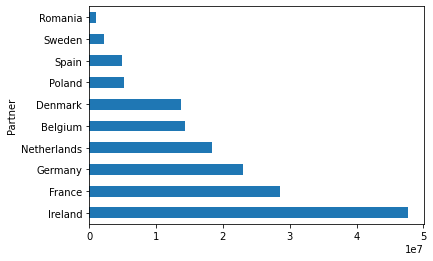

In [10]:
totalImports.head(10).plot(kind='barh')

In [17]:
exports = milk[milk[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The UK exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the UK are:')
totalExports = grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False)
totalExports.head()

The UK exports to 107 countries.
The 5 biggest importers from the UK are:


Partner
Ireland                 128205584
Netherlands              19893485
China                    14111163
Germany                  11393222
China, Hong Kong SAR      9482458
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

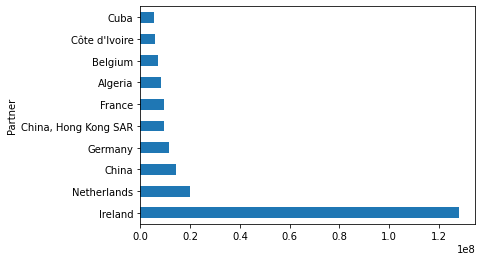

In [18]:
totalExports.head(10).plot(kind='barh')

In [19]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 201501) & (regular[COMMODITY] == 'processed')]

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
201,201501,Belgium,Exports,processed,142603
204,201501,China,Exports,processed,1013141
208,201501,Cyprus,Exports,processed,6601
211,201501,Denmark,Exports,processed,107883
214,201501,France,Exports,processed,178209
216,201501,Germany,Exports,processed,2588374
221,201501,"China, Hong Kong SAR",Exports,processed,1110086
222,201501,Hungary,Exports,processed,2119
225,201501,Ireland,Exports,processed,4020443
226,201501,Italy,Exports,processed,23256


In [20]:
regular[VALUE].sum() / exports[VALUE].sum()

0.7606021669984898

In [21]:
countries = pivot_table(milk, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Algeria,8087885.0,NaN
Angola,2416129.0,NaN
Antigua and Barbuda,22218.0,NaN
"Areas, nes",51205.0,NaN
Australia,81644.0,NaN


In [22]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Austria,56160.0,780.0
Belgium,7215960.0,14303482.0
Czech Rep.,2590.0,487196.0
Denmark,337622.0,13681571.0
France,9394028.0,28484766.0
Germany,11393222.0,22954774.0
Hungary,71331.0,4762.0
Ireland,128205584.0,47729692.0
Italy,173015.0,320150.0
